# ILCI NIRS Workshop 2024

Marjorie Hanneman, Sam Herr, and Erin Farmer

### This example code and analysis is made using Jenna Hershberger's waves package vignette.

Hershberger, J, Morales, N, Simoes, CC, Ellerbrock, B, Bauchet, G,
Mueller, LA, Gore MA. Making waves in Breedbase: An integrated spectral
data storage and analysis pipeline for plant breeding programs. Plant
Phenome J. 2021; 4:e20012. <https://doi.org/10.1002/ppj2.20012>

### Originally designed application in the context of resource-limited plant research and breeding programs, waves provides an open-source solution to spectral data processing and model development by bringing useful packages together into a streamlined pipeline. This package is wrapper for functions related to the analysis of point visible and near-infrared reflectance measurements. It includes visualization, filtering, aggregation, pretreatment, cross-validation set formation, model training, and prediction functions to enable open-source association of spectral and reference data.

Install Packages if needed. This only needs to be installed once. If packages have already been
installed, go to loading packages.

```{r}
install.packages("waves")
install.packages("magrittr")
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("tibble")
```

# Load Packages

In [15]:
library(waves)
library(magrittr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(tibble)

For this workshop, we will be using ikeogu.2017 as are spectral data
set. The data set is already loaded within the waves package for us to
practice with.


# Read in the Data

In [3]:
ikeogu.2017 <- read.csv("workshop_data_raw.csv")

Match spectra with reference values so that you have a data.frame with
unique identifiers, reference values, and other metadata as columns to
the left of spectral values. Spectral column names should start with
"X". Remove rows with missing values.

In [4]:
ikeogu.2017.prepped <- ikeogu.2017 %>%
  dplyr::rename(unique.id = sample.id,
                reference = DMC.oven) %>%
  dplyr::select(unique.id, dplyr::everything(), -TCC) %>%
  na.omit()

In the above code chunk, we change the column names to unique.id and
reference, and remove 'NAs'. This format will then be able to run
through the next functions.

*NOTE: The output of your spectrometer will not always match this
example. Data will need to be cleaned to match this format. Examples
from 3 other spectrometers will be shown during the workshop.*

Let's look at the reformatted version:


In [5]:
head(ikeogu.2017.prepped)

,unique.id,study.name,reference,X350,X351,X352,X353,X354,X355,X356,⋯,X2491,X2492,X2493,X2494,X2495,X2496,X2497,X2498,X2499,X2500
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C16Mcal_1,C16Mcal,39.62109,0.4881079,0.4951843,0.5064697,0.4936774,0.5003592,0.4962925,0.4973705,⋯,1.857719,1.857910,1.863142,1.865476,1.867221,1.868554,1.866739,1.867465,1.870405,1.870702
2,C16Mcal_2,C16Mcal,35.52017,0.5727389,0.5682541,0.5987507,0.5926611,0.5806372,0.5973821,0.6135981,⋯,1.885478,1.883329,1.885453,1.884579,1.886785,1.891462,1.893840,1.901451,1.891114,1.888507
3,C16Mcal_3,C16Mcal,42.04462,0.5989934,0.6266454,0.6243098,0.6061565,0.6068211,0.6243312,0.6330916,⋯,1.825795,1.825972,1.833456,1.838838,1.838917,1.832336,1.834644,1.828793,1.826562,1.832022
4,C16Mcal_4,C16Mcal,39.00999,0.5169374,0.5164186,0.5142049,0.5359698,0.5422874,0.5360844,0.5416143,⋯,1.827935,1.835462,1.833816,1.836358,1.841245,1.839129,1.837023,1.836635,1.835856,1.834857
5,C16Mcal_5,C16Mcal,33.44273,0.5189608,0.5477946,0.5537615,0.5487567,0.5493369,0.5665216,0.5642785,⋯,1.883251,1.887897,1.891501,1.894932,1.891752,1.899751,1.900873,1.897076,1.899430,1.896130
6,C16Mcal_6,C16Mcal,32.12512,0.5756445,0.5655236,0.5890065,0.5914589,0.6133479,0.6275351,0.6171030,⋯,1.838738,1.841570,1.848329,1.851043,1.852159,1.848211,1.843651,1.846265,1.847147,1.841661


# Visualize Spectra

Let's look at the spectra in our data set. We will use the
`plot_spectra()` function.

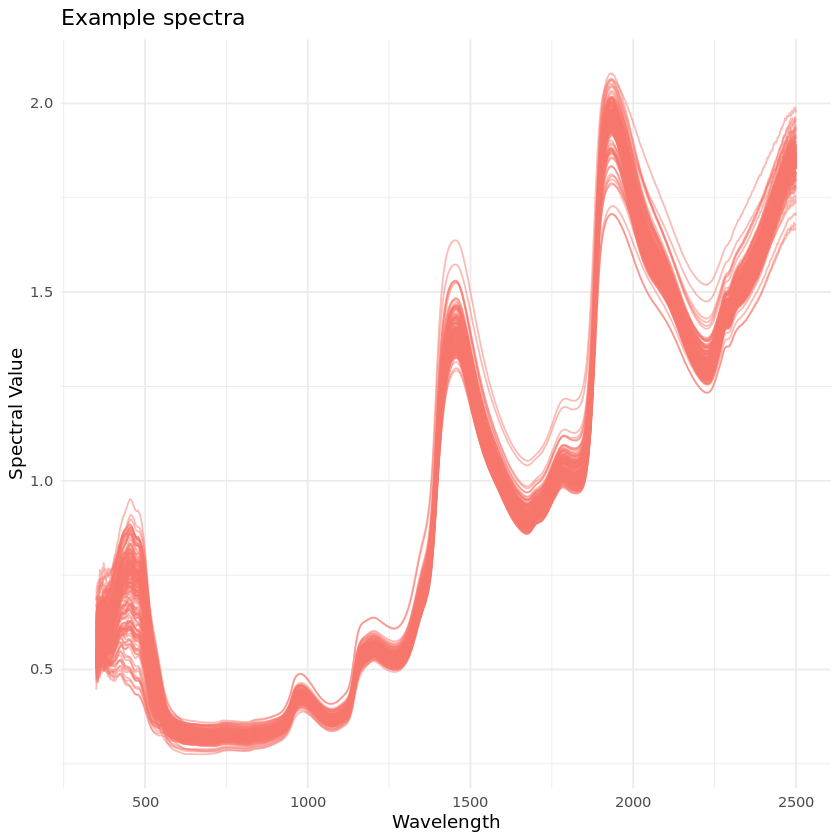

In [6]:
ikeogu.2017.prepped %>%
  plot_spectra(
    df = .,
    num.col.before.spectra = 5,
    detect.outliers = FALSE,
    alternate.title = "Example spectra"
  )

# Outlier Removal

waves uses Mahalanobis distance to identify outliers. Mahalanobis
distance is a common metric used to identify multivariate outliers. The
larger the value of Mahalanobis distance, the more unusual the data
point (i.e., the more likely it is to be a multivariate outlier).

The distance tells us how far an observation is from the center of the
cloud, taking into account the shape (covariance) of the cloud as well.

To detect outliers, the calculated Mahalanobis distance is compared
against a χ2 distribution with degrees of freedom equal to the number of
spectral data columns and an alpha level of 0.05.

In [7]:
filtered.df <- ikeogu.2017.prepped %>%
  filter_spectra(
    df = .,
    filter = TRUE,
    return.distances = TRUE,
    num.col.before.spectra = 5,
    window.size = 15
    )

filtered.df[1:5, c(1:5, (ncol(filtered.df) - 3):ncol(filtered.df))]


Removed 0 rows.


,unique.id,study.name,reference,X350,X351,X2498,X2499,X2500,h.distances
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C16Mcal_1,C16Mcal,39.62109,0.4881079,0.4951843,1.867465,1.870405,1.870702,139.8898
2,C16Mcal_2,C16Mcal,35.52017,0.5727389,0.5682541,1.901451,1.891114,1.888507,149.5721
3,C16Mcal_3,C16Mcal,42.04462,0.5989934,0.6266454,1.828793,1.826562,1.832022,140.5149
4,C16Mcal_4,C16Mcal,39.00999,0.5169374,0.5164186,1.836635,1.835856,1.834857,148.3881
5,C16Mcal_5,C16Mcal,33.44273,0.5189608,0.5477946,1.897076,1.899430,1.896130,152.2514


No outliers were identified in the example dataset. Note the if
return.distances is set to TRUE, the rightmost column contains
Mahalanobis distances (h.distances).

# Aggregate Scans

If you have more than one scan per unique identifier, aggregate the
scans by mean or median with `aggregate_spectra().`

This is helpful when a sample has been scanned multiple times. To ensure accurate readings, it is best to take 3-5 scans of the same sample. Here, we combine the reps into an average value for each wavelength.

In this example, we will aggregate by study.name.

In [8]:
aggregated.test <- ikeogu.2017.prepped %>%
  aggregate_spectra(
    grouping.colnames = c("study.name"),
    reference.value.colname = "reference",
    agg.function = "mean"
    )
aggregated.test[, 1:5]

study.name,reference,X350,X351,X352
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
C16Mcal,36.06255,0.5589216,0.5619379,0.5685708
C16Mval,36.39604,0.5448650,0.5492415,0.5521408


# Pretreat Spectra

Reducing noise that is inherent in the use of a spectrometer to allow better accuracy.

Specify which spectral pretreatments (1-13) to apply with the parameter
pretreatment. `pretreat_spectra()` can also be used on its own to
transform a data.frame using any/all of 12 available pretreatments:

1.  Raw data (no pretreatment is applied)

2.  Standard normal variate (SNV)

3.  SNV and first derivative

4.  SNV and second derivative

5.  First derivative

6.  Second derivative

7.  Savitzky--Golay filter (SG)

8.  SNV and SG

9.  Gap segment derivative (window size = 11)

10. SG and first derivative (window size = 5)

11. SG and first derivative (window size = 11)

12. SG and second derivative (window size = 5)

13. SG and second derivative (window size = 11)

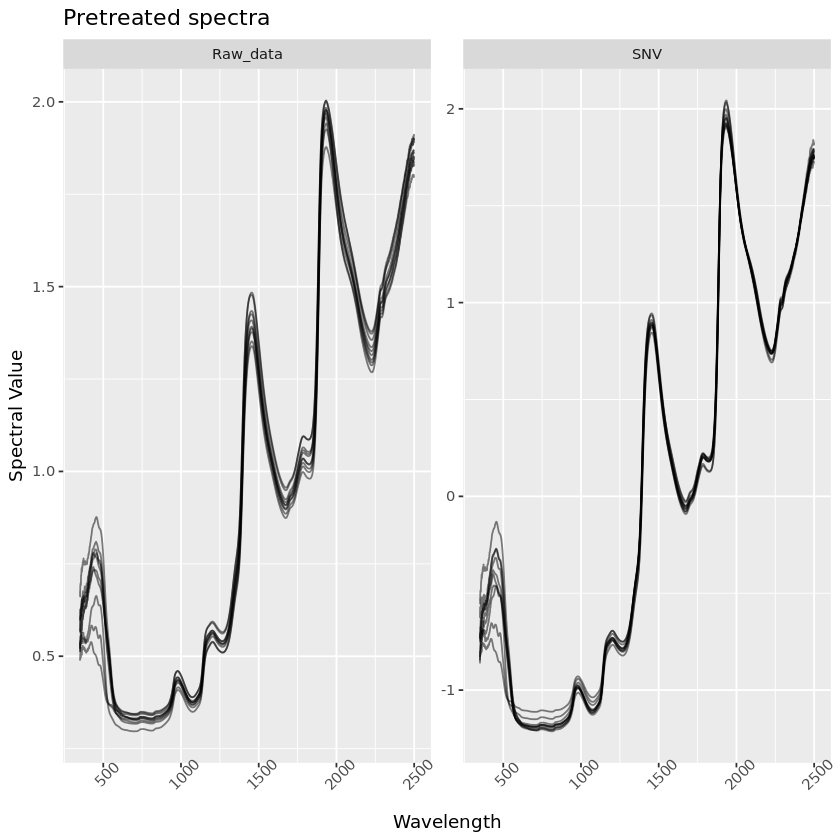

In [9]:
ikeogu.2017.prepped[1:10,] %>% # subset the first 10 scans for speed
  pretreat_spectra(pretreatment = 1:2) %>% # raw data versus SNV pretreatment reduces noise
  bind_rows(.id = "pretreatment") %>%
  gather(key = "wl",
         value = "s.value",
         tidyselect::starts_with("X")) %>%
  mutate(wl = as.numeric(readr::parse_number(.data$wl)),
         pretreatment = as.factor(pretreatment)) %>%
  drop_na(s.value) %>%
  ggplot(data = ., aes(x = wl, y = s.value, group = unique.id)) +
  geom_line(alpha = .5) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title = "Pretreated spectra",
       x = "Wavelength",
       y = "Spectral Value") +
  
  facet_wrap( ~ pretreatment, scales = "free")

# Cross Validation

Choose from random, stratified random, or a plant breeding-specific
scheme from Jarquín et al., 2017. The Plant Genome. If `cv.scheme` is
set to `NULL`, the argument `stratified.sampling` is used to determine
whether stratified random sampling should be performed. If `TRUE`, the
reference values from the input `data.frame (train.data)` will be used
to create a balanced split of data between the training and test sets in
each training iteration.

Cross-validation schemes can also be formatted outside of
`test_spectra()` using the function `format_cv()`


# Evaluate Spectra

`test_spectra()` is a wrapper that performs spectral pretreatment,
cross-validation set formation, and model training functions over
multiple iterations.

Note that the following subsections describe functions that are called
within `test_spectra()`. They do not need to be used separately for
model pretreatment, cross-validation set formation, or model training.

Some of the arguments for this function are detailed below. See `?test_spectra()`
for more information on the arguments and output for this function.

In [20]:
results.list <- ikeogu.2017.prepped %>%
 dplyr::filter(study.name == "C16Mcal") %>%
 dplyr::select(unique.id, reference, dplyr::starts_with("X")) %>%
 na.omit() %>%
 test_spectra(
   train.data = .,
   tune.length = 3,
   num.iterations = 3,
   pretreatment = 1
  )

Pretreatment initiated.
Training models...
Working on Raw_data 
Returning model...


# Output

`test_spectra()` outputs a list with four objects. We will focus on two:


1.  `predictions` is a `data.frame` containing both reference and
    predicted values for each test set entry in each iteration of model
    training.


In [21]:
head(results.list$predictions)

,Iteration,ModelType,unique.id,reference,predicted
,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,pls,C16Mcal_3,42.0446205,39.9709964576392
2,1,pls,C16Mcal_8,26.2774601,30.5714512562458
3,1,pls,C16Mcal_12,41.9791336,40.7216956674882
4,1,pls,C16Mcal_18,39.5632248,37.4632054378795
5,1,pls,C16Mcal_21,37.6122742,37.8997322126705
6,1,pls,C16Mcal_23,37.1399994,36.5842088907547


2.  `summary.model.performance` is a `data.frame` containing summary
    statistics across all model training iterations and pretreatments.
    See below for a description of the summary statistics provided.


In [22]:
results.list$summary.model.performance

SummaryType,ModelType,RMSEp,R2p,RPD,RPIQ,CCC,Bias,SEP,RMSEcv,R2cv,R2sp,best.ncomp,best.ntree,best.mtry
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,pls,2.2964266,0.71663479,1.8576974,2.4122083,0.81729051,0.2988620,2.3290017,1.93724646,0.800709658,0.7162828,3,NA,NA
sd,pls,0.3046969,0.07095656,0.2422322,0.3452081,0.04515673,0.5644276,0.3090191,0.05668951,0.007452928,0.1166805,0,NA,NA
mode,pls,1.9908914,0.77552744,2.1332739,2.7211685,0.86930561,-0.1192239,2.0191324,1.96560415,0.793929727,0.7785734,3,NA,NA


# Model Methods

Quantitative vs qualitative, update to waves package coming soon

When using the test_spectra() function, you can choose between different model methods. The default is partial least squares regression. To implement a different model method, you can specify this with the "model.method" argument. The code below shows model training with two additional model methods: support vector machine and random forest.


# Selecting the best model

When picking the best model, the training and test set should be the same.

Across pretreatments, the average RMSEs and R-squareds for each model method are as follows:

pls: RMSE = 2.044, R-squared = 0.778


svmLinear: RMSE = 1.425, R-squared = 0.887


rf: RMSE = 2.119, R-squared = 0.750


We can compare these metrics to select the best model method for our data. We want to minimize the RMSE and maximize the R-squared.

## The svmLinear model performs the best!

ta.

# Save trained prediction models

-   Intended for a production environment

-   Can evaluate spectral pretreatment methods using the input dataset

-   Selects best model using the metric provided with
    `best.model.metric` ("RMSE" or "Rsquared")

-   Returns trained model with option to save as .Rds object

-   The `$model` output from `test_spectra()` can also be saved and used
    for prediction, but `save_model()` will take the extra step of
    saving an .Rds file for you if `write.model` is set to `TRUE`.

    In the example below, we'll use one subset of the example data set
    ("C16Mcal") to create the model and then we'll predict the other
    subset ("C16Mioodel.

In [19]:
model.to.save <- ikeogu.2017.prepped %>%
   dplyr::filter(study.name == "C16Mcal") %>%
   dplyr::select(unique.id, reference, dplyr::starts_with("X")) %>%
   na.omit() %>%
   save_model(
     df = .,
     write.model = FALSE,
     pretreatment = 1:13,
     tune.length = 5,
     num.iterations = 3,
     verbose = FALSE
   )

Let's look at the model:

In [20]:
model.to.save$best.model.stats %>% 
  gather(key = "statistic", value = "value", RMSEp_mean:best.mtry_mode) %>% 
  separate(statistic, into =  c("statistic", "summary_type"), sep = "_") %>% 
  pivot_wider(id_cols = c(Pretreatment, summary_type), 
              names_from = statistic, values_from = value)

Pretreatment,summary_type,RMSEp,R2p,RPD,RPIQ,CCC,Bias,SEP,RMSEcv,R2cv,R2sp,best.ncomp,best.ntree,best.mtry
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SNVSG,mean,1.49491944,0.886009729,2.8242283,3.6628767,0.929913650,0.06222445,1.51612503,1.36332288,0.901220216,0.86785276,5,NA,NA
SNVSG,sd,0.04986273,0.002192948,0.1245287,0.2077056,0.005870304,0.60480842,0.05057004,0.01277409,0.004734882,0.02301871,0,NA,NA
SNVSG,mode,1.55222130,0.885322650,2.7361540,3.4901924,0.926391367,-0.62430093,1.57423972,1.35989558,0.901364250,0.86775099,5,NA,NA


# Predict phenotypic values with new spectra

If generating predictions from a saved model file in .Rds format, use
`predict_spectra()`. If the model object is already in your R
environment, the function `stats::predict()` can be used to generate
predictions. `predict_spectra()` pulls the best model hyperparameters
from your saved model object, but if using `stats::predict()`, these
must be supplied separately.

Using the model we trained, we can predict cassava root dry
matter content for our held out validation set:

First, determine which pretreatment generated the best model. In this
case, it's "SNVSG", which is pretreatment #8. Pretreat the new spectral
dataset with these spectra.

In [21]:
pretreated.val <- ikeogu.2017.prepped %>% 
  filter(study.name == "C16Mval") %>% 
  pretreat_spectra(pretreatment = 8) 

pretreated.val.mx <- pretreated.val %>% 
  dplyr::select(starts_with("X")) %>% 
  as.matrix()

best.ncomp <- model.to.save$best.model.stats$best.ncomp_mode

Perform predictions:

In [22]:
predicted.values <- as.numeric(predict(model.to.save$best.model,
      newdata = pretreated.val.mx, ncomp = best.ncomp))

Assess:

In [23]:
spectacles::postResampleSpectro(pred = predicted.values, obs = pretreated.val$reference)

RMSE  Rsquared       RPD      RPIQ       CCC      Bias        SE 
1.5623465 0.8499210 2.4572591 2.7400322 0.8999667 0.3619829 1.5772976

Plot predictions:

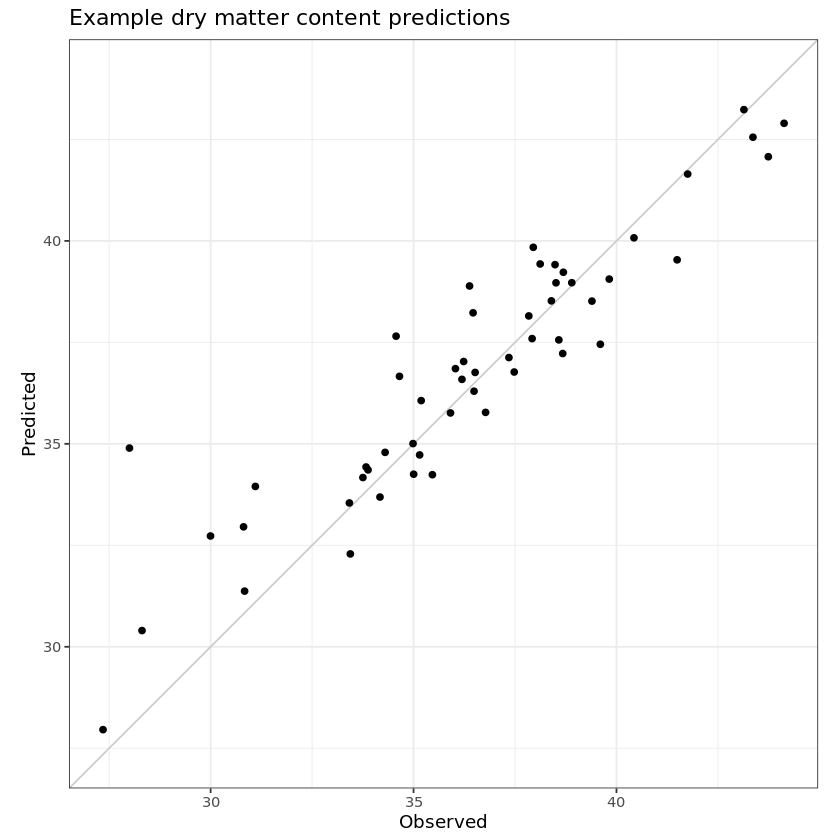

In [24]:
overall.range <- c(min(c(pretreated.val$reference, predicted.values)),
                   max(c(pretreated.val$reference, predicted.values)))
cbind(unique.id = pretreated.val$unique.id, 
      observed = pretreated.val$reference, 
      predicted = predicted.values) %>% 
  as_tibble() %>% 
  mutate(observed = as.numeric(observed),
         predicted = as.numeric(predicted)) %>% 
  ggplot(aes(x = observed, y = predicted)) + 
  geom_abline(intercept = 0,
              slope = 1,
              color = "gray80") +
  geom_point() +
  coord_fixed(xlim = overall.range,
                  ylim = overall.range) + 
  labs(title = "Example dry matter content predictions",
       x = "Observed",
       y = "Predicted") + 
  theme_bw()

# Using new data to make predictions

We don't have DM values for a set of cassava genotypes, must predict using spectra values.


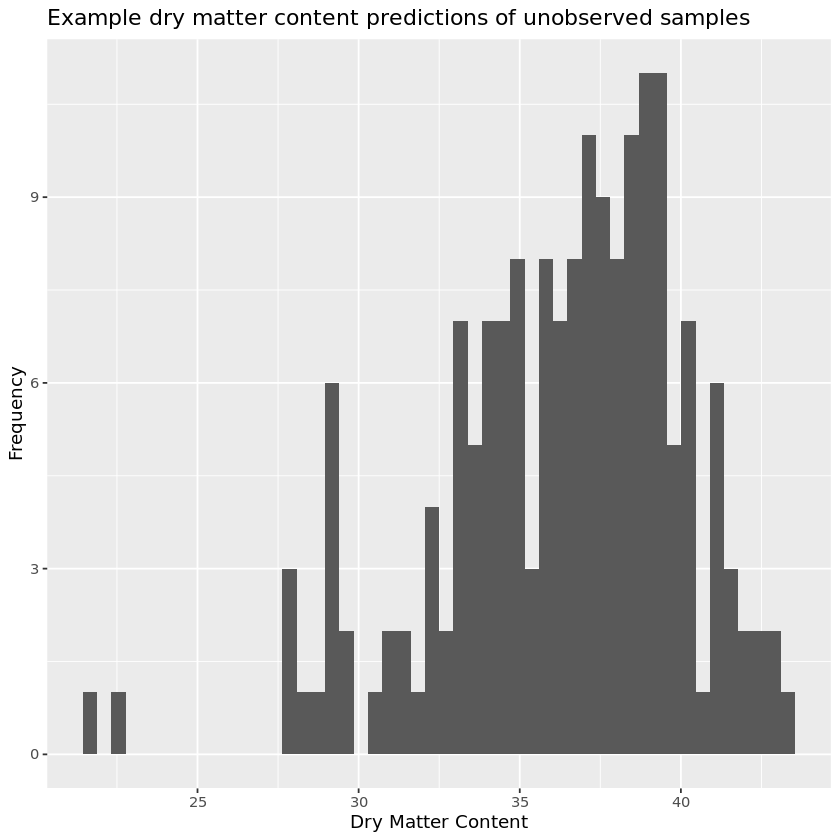

In [25]:
#read in new dataset
unphenotyped_NIRS <- read.csv("unphenotyped_NIRS.csv")

#pretreat values with best pretreatment
pretreated.test <- unphenotyped_NIRS[,-1] %>% 
  pretreat_spectra(pretreatment = 8) 

#format matrix
pretreated.test.mx <- pretreated.test %>% 
  dplyr::select(starts_with("X")) %>% 
  as.matrix()

#obtain predicted DMC values with best fit model and format data.frame
predicted.values <- as.numeric(predict(model.to.save$best.model,
      newdata = pretreated.test.mx, ncomp = best.ncomp)) %>% 
  cbind("sample.id" = unphenotyped_NIRS$sample.id, "DM_predictions" = .) %>% as.data.frame()
predicted.values$DM_predictions <- as.numeric(predicted.values$DM_predictions)

#plot predicted DMC
ggplot(predicted.values, aes(x = DM_predictions)) +  geom_histogram(bins =50) +
    labs(title = "Example dry matter content predictions of unobserved samples",
       x = "Dry Matter Content",
       y = "Frequency")

In [26]:
#get top 5 percent
top_5_percent <- predicted.values %>%
  arrange(desc(DM_predictions)) %>%
  slice_head(prop = 0.05)

print(top_5_percent)

     sample.id DM_predictions
1 C17Mtest_125       43.23459
2  C17Mtest_22       42.95232
3 C17Mtest_122       42.89810
4 C17Mtest_124       42.55538
5 C17Mtest_116       42.36662
6 C17Mtest_123       42.07428
7  C17Mtest_53       41.83973
8   C17Mtest_3       41.70233
